In [ ]:
import pandas as pd
import numpy as np
import os
from scipy import stats

from sklearn.svm import SVC

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits import mplot3d

# A. Linear SVM

##### 1. Create data

In [ ]:
from sklearn.datasets import make_blobs

# Simulate linearly separable data
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

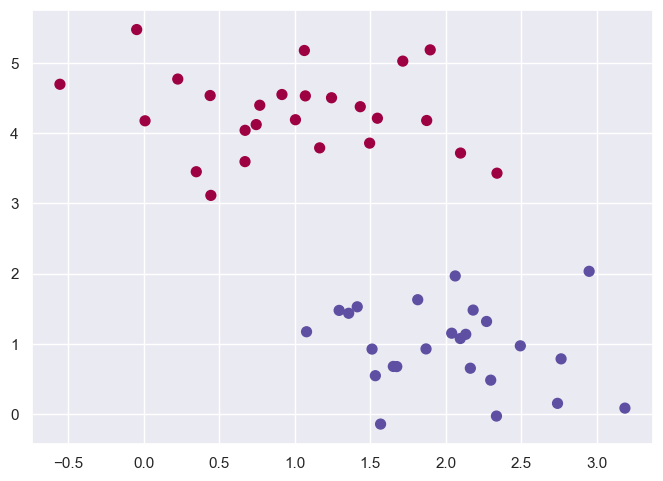

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)

In [ ]:
X.shape

(50, 2)

##### 2. Plot few decision boundaries with margin

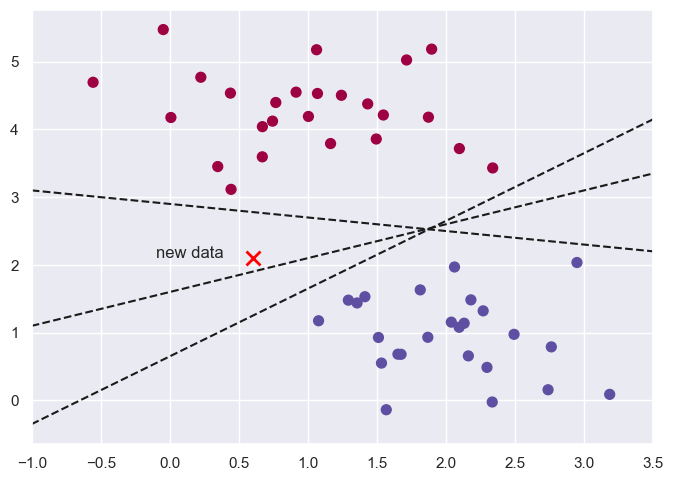

In [ ]:
# Draw few lines that separate the linearly separable data
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
xfit = np.linspace(-1, 3.5)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
ax.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)
ax.text(-0.1, 2.1, 'new data', fontsize = 12)
for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  ax.plot(xfit, w * xfit + b, '--k')
  ax.set_xlim(-1, 3.5);

(-1.0, 3.5)

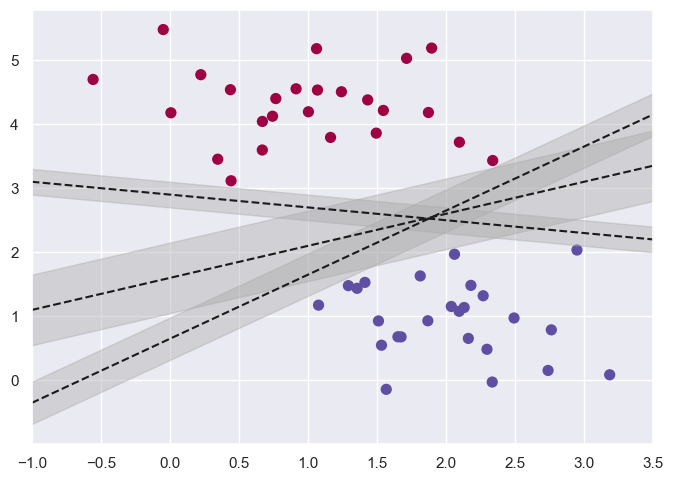

In [ ]:
## Plot margins for the lines that separate the linearly separable data
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
for w, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = w * xfit + b
  ax.plot(xfit, yfit, '--k')
  ax.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha=0.4)
ax.set_xlim(-1, 3.5)

##### 3. Utility functions

In [ ]:
# User-defined function to plot the decision boundary with margins
# for a two-dimensional SVC
def plot_svc_decision_function(model, ax = None, plot_margin = True, plot_support = True):
  if ax is None:
    ax = plt.gca()

  # Generate 2D grid of points with 1000 x 1000 points
  x1, x2 = np.mgrid[np.min(X[:, 0]) - 0.5:np.max(X[:, 0]) + 0.5:1000j,
                    np.min(X[:, 1]) - 0.5:np.max(X[:, 1]) + 0.5:1000j]

  ax.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
  ax.set_xlim(x1.min(), x1.max())
  ax.set_ylim(x2.min(), x2.max())
  #plt.title(' ')

  # Calculate category corresponding to each point on the grid
  category = model.predict(np.vstack([x1.flatten(), x2.flatten()]).T).reshape(x1.shape)
  ax.contourf(x1, x2, category, cmap = plt.cm.Spectral, alpha = 0.3)

  # Plot margin
  if plot_margin:
    # Calculate score corresponding to each point on grid
    score = model.decision_function(np.vstack([x1.flatten(), x2.flatten()]).T).reshape(x1.shape)
    ax.contour(x1, x2, score, colors = 'k',
               levels = [-1, 0, 1],
               linestyles = ['--', '-', '--'])

  # Plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 150, linewidth = 1, facecolors = 'none', edgecolors = 'k')

##### 4. Fit default SVC and plot

In [ ]:
## Fit a linear support vector machine model (linear decision boundary)
model = SVC(kernel = 'linear')
model.fit(X, y)

SVC(kernel='linear')

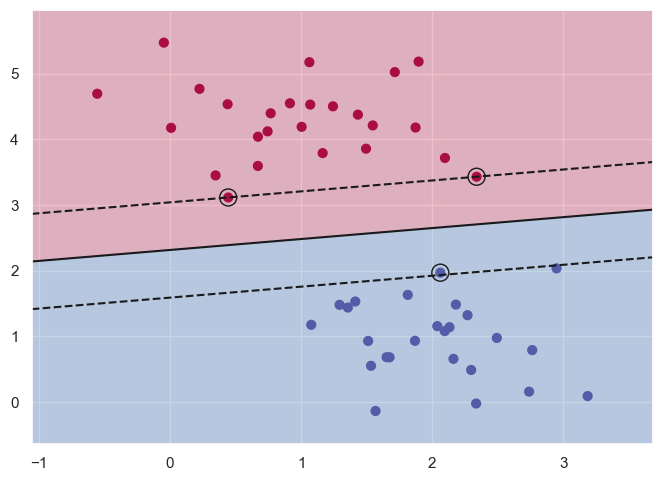

In [ ]:
# Plot linear decision boundary of linear model with margins
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
plot_svc_decision_function(model, ax)

##### 5. Fit SVC with reg parameter C

In [ ]:
## Fit a linear support vector machine model (linear decision boundary)
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

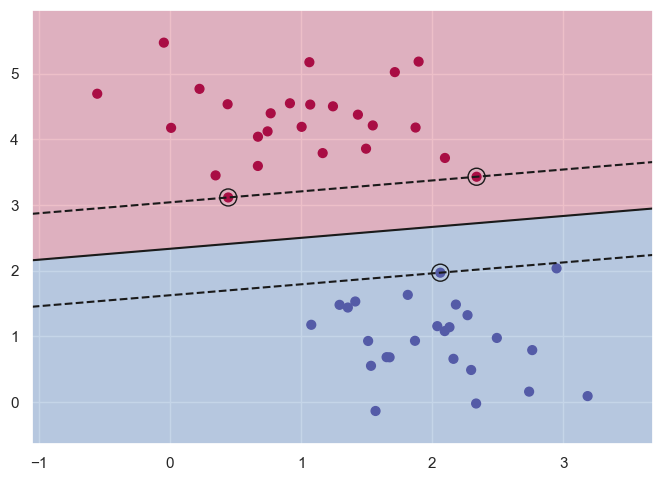

In [ ]:
# Plot linear decision boundary of linear model with margins
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
plot_svc_decision_function(model, ax)

##### 6. model coefficients

In [ ]:
# Print the samples that are the support-vectors (special samples)
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [ ]:
# Bias or intercept of the decision boundary line
print(model.intercept_)
# Weight for the first output class which is also the decision boundary line's slope
print(model.coef_[0][0])
# Weights for the two classes
print(model.coef_)

[3.29634152]
0.23525693639787337
[[ 0.23525694 -1.41250783]]


##### 7. SVM for different C for data is more spread out

In [ ]:
# Plot the model learned from the first 60 points and then from the
# first 120 points of the linearly separable dataset
def plot_svm(N = 10, C = 0, ax = None):
  X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0,
                    cluster_std = 0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel = 'linear', C=C)
  model.fit(X, y)
  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

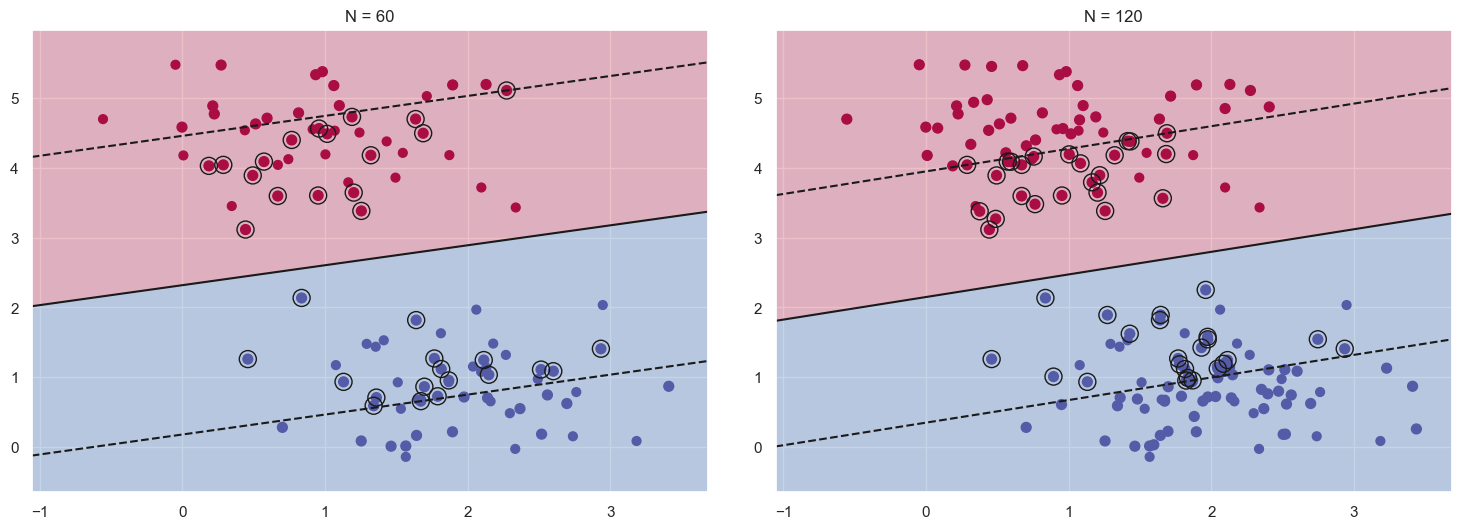

In [ ]:
C = C = 1E-2
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, C, axi)
  axi.set_title('N = {0}'.format(N))

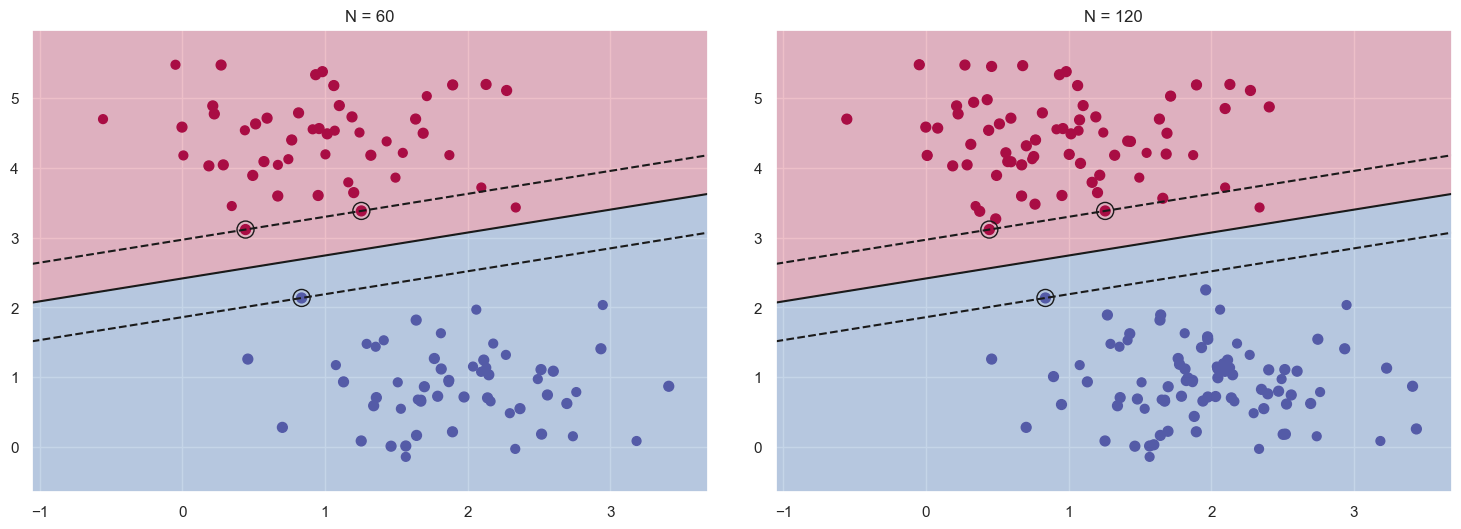

In [ ]:
C = 1E5
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, C, axi)
  axi.set_title('N = {0}'.format(N))

**Interpreting above result**

$$
\mathcal{J}(w, b) = \min_{w, b} \frac{\|w\|^2}{2} + C \sum_{i=1}^m max(0, 1-y^{(i)}(w^Tx^{(i)} + b))
$$

<h5 align="center">Overall Loss = data loss + regularization (penalty) loss</h4>

1. Decision boundary has to be linear (because of how we configured SVC)
2. When C was less, the overall contribution of the penalty term (second term) to loss is lesser, hence SVM forms a wider margin for support vectors
3. When C is high, the contribution of penalty term to overall loss is very high, hence the SVM solver of the overall loss tries to reduce penalties. The only way to do this is by increasing the margin, even at the cost of a higher misclassification rate during training

# B. Non linear SVM (using Kernels)

##### 1. Fitting with RBF Kernel

In [ ]:
from sklearn.datasets import make_circles

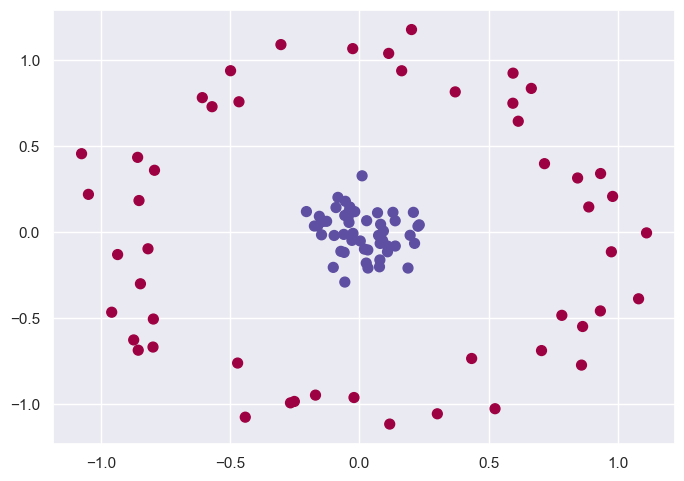

In [ ]:
# Simulate nonlinear separable data and plot
X, y = make_circles(100, factor = .1, noise = .1)
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)

In [ ]:
# Fit a linear model (linear decision boundary) for the nonlinear separable data
model = SVC(kernel = 'linear', C = 1e06).fit(X, y)

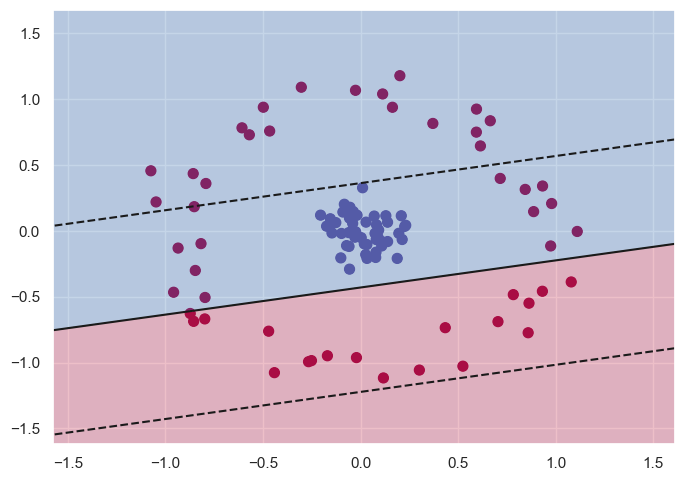

In [ ]:
# Plot the linear decision boundary with margins
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
plot_svc_decision_function(model, ax, plot_support = False)

In [ ]:
# Let's investigate a new feature for the nonlinear data
r = np.exp(-(X ** 2).sum(1))

In [ ]:
# Fit a nonlinear model (nonlinear decision boundary) to the nonlinear data
model = SVC(kernel = 'rbf', C = 1E6)
model.fit(X, y)

SVC(C=1000000.0)

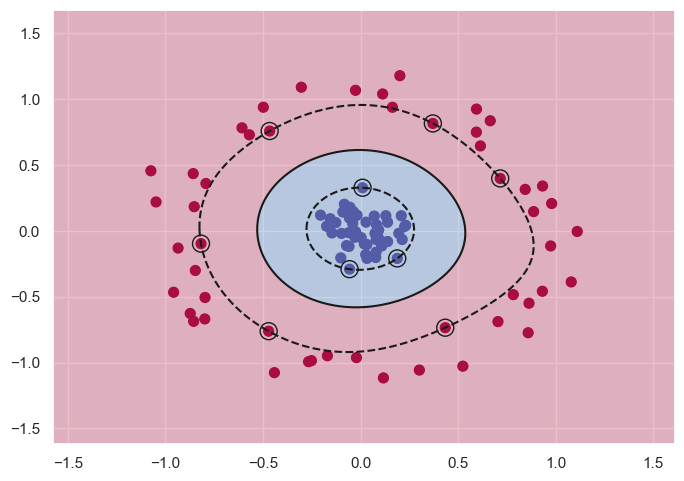

In [ ]:
# Plot the nonlinear decision boundary with margins
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
plot_svc_decision_function(model, ax)

![Separating Non linear data with linear decision boundary](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211976&authkey=%21ABOMS2jSDP8lp3U&width=400)
![Non linear data](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211975&authkey=%21AMt5oynPpKUuKBw&width=450)

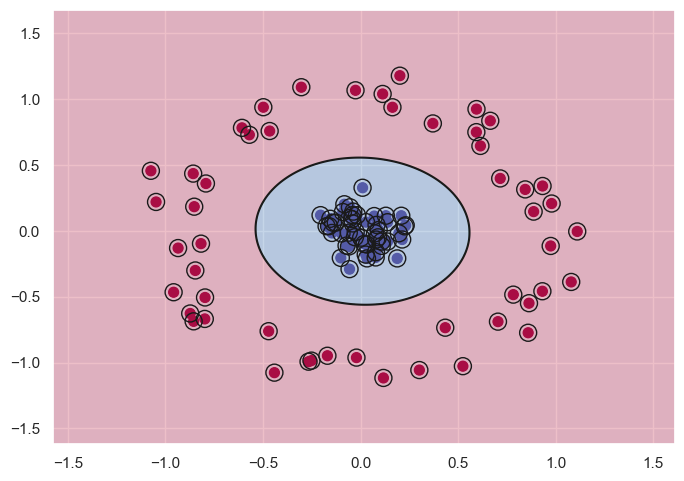

In [ ]:
model = SVC(kernel = 'rbf', C = 1E-6)
model.fit(X, y)
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
plot_svc_decision_function(model, ax)

# C. RBF kernel in detail

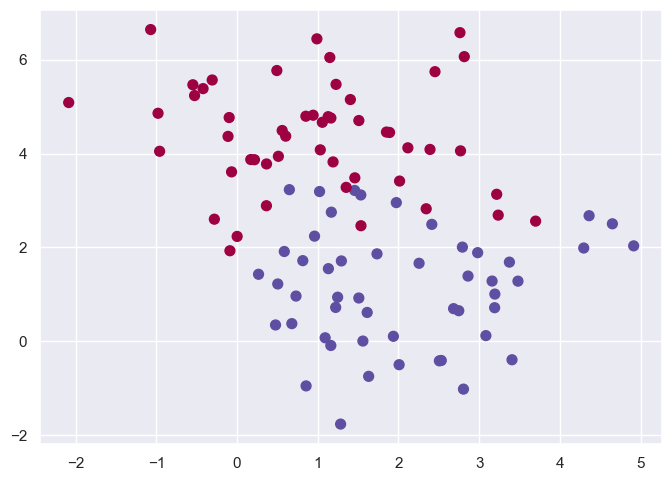

In [ ]:
# Simulate data that is non-separable and plot
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)

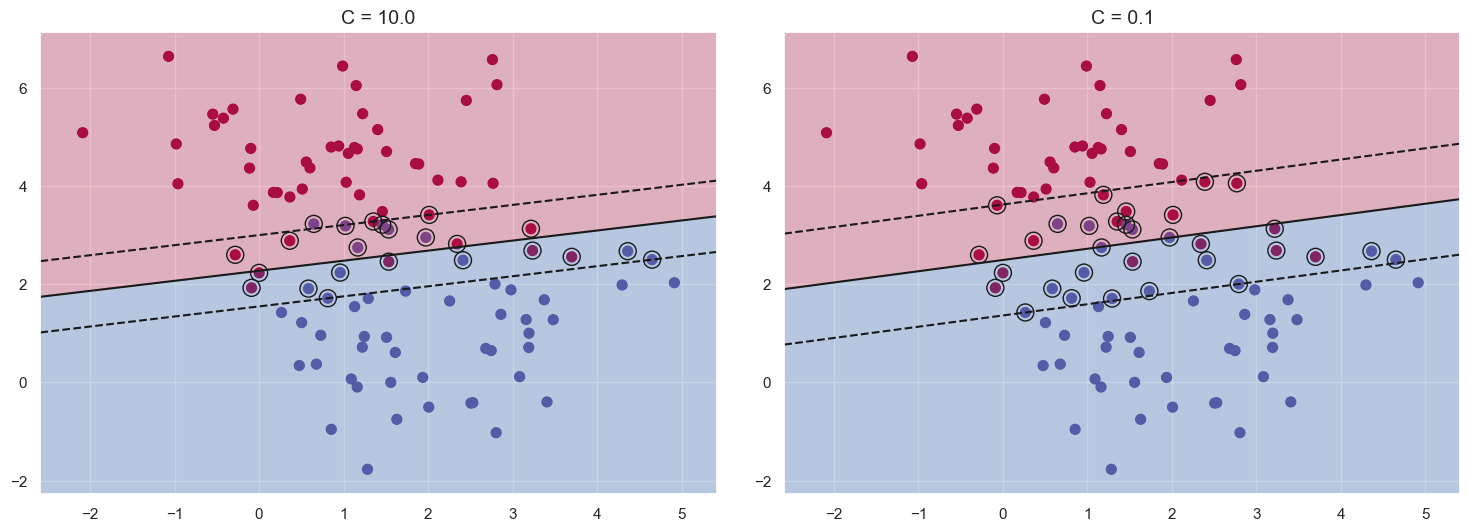

In [ ]:
# Fit a linear model (linear decision boundary) to the non-separable data
# and investigate the margin for small and large values of parameter C
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
  plot_svc_decision_function(model, axi)
  axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
# Fit a nonlinear model (nonlinear decision boundary) to the non-separable data
model = SVC(kernel = 'rbf', C = 1E-3)
model.fit(X, y)

SVC(C=0.001)

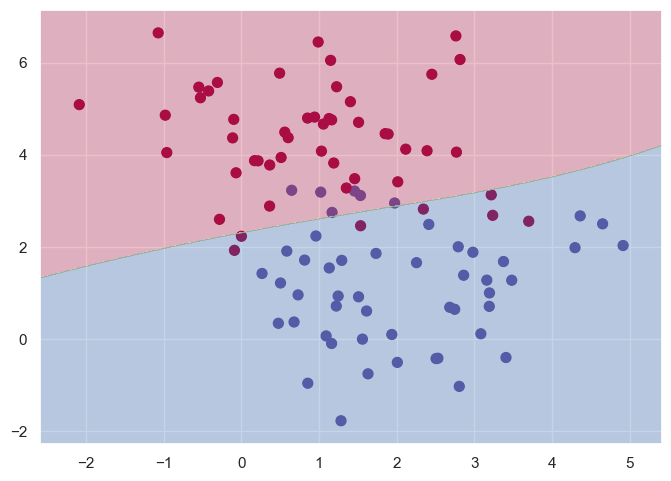

In [ ]:
# Plot the nonlinear decision boundary
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
plot_svc_decision_function(model, ax, plot_margin = False, plot_support = False)

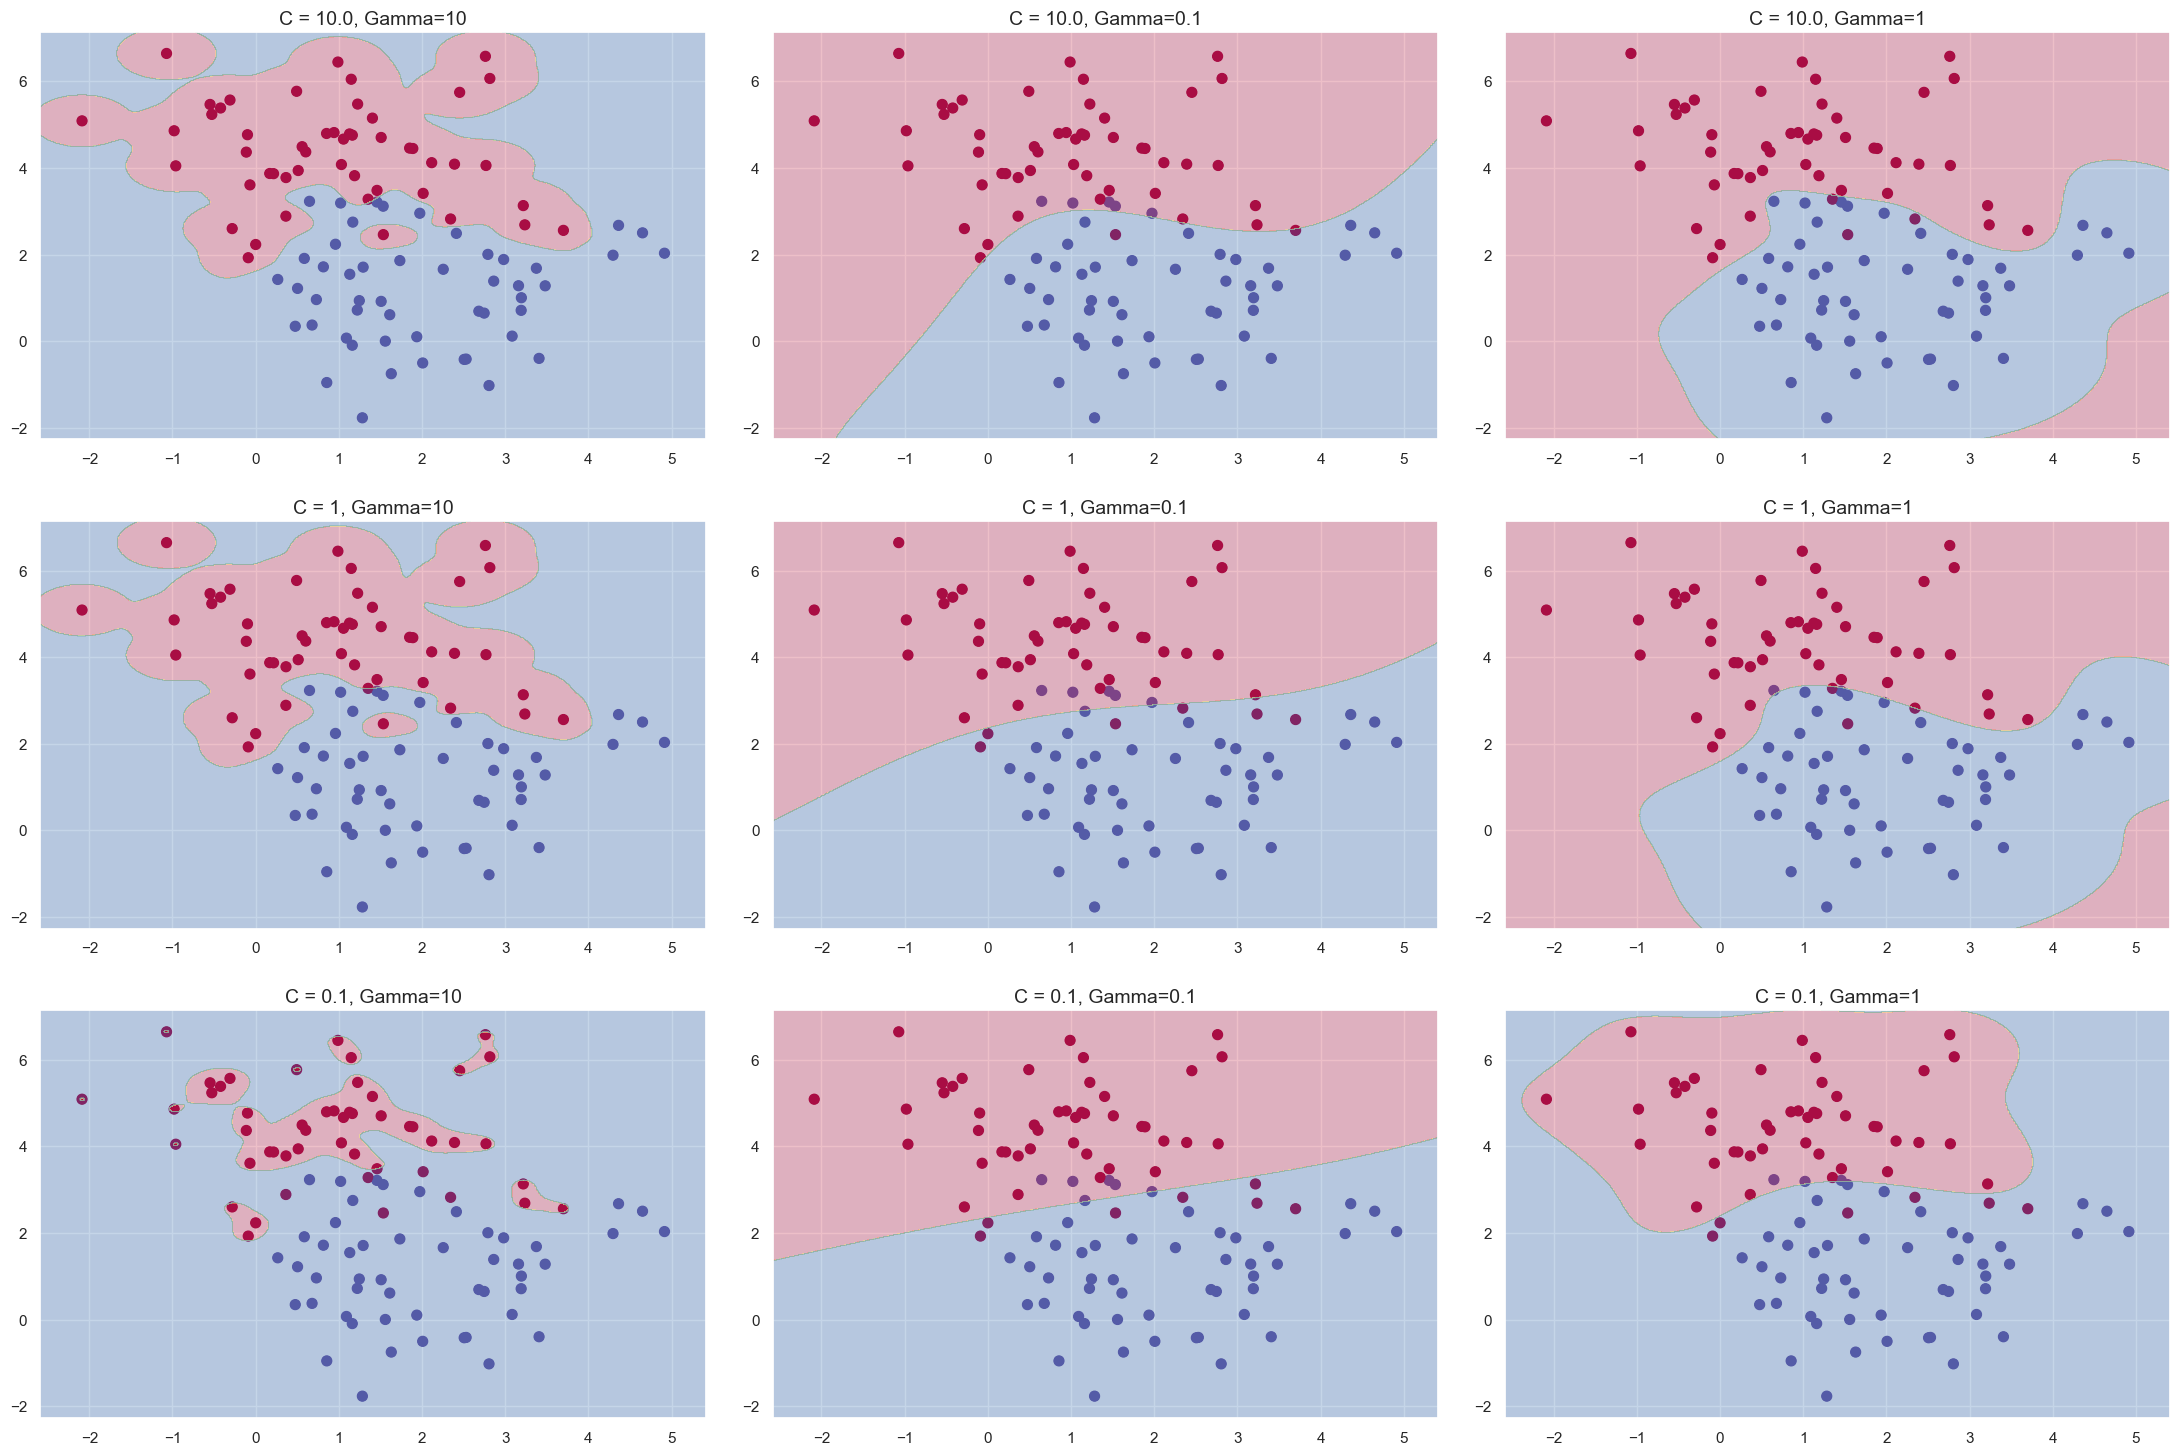

In [ ]:
from itertools import product
# Investigate nonlinear decision boundary for non-separable data
# for different values of the parameter C
fig, ax = plt.subplots(3, 3, figsize=(24, 18))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax, [10.0, 1, 0.1]):
  for axy, gamma in zip(axi, [10, 0.1, 1]):
    model = SVC(kernel = 'rbf', C = C, gamma = gamma).fit(X, y)
    axy.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
    plot_svc_decision_function(model, axy, plot_margin = False, plot_support = False)
    axy.set_title(f'C = {C}, Gamma={gamma}', size=14)


**Understanding gamma in RBF**

![Separating Non linear data with linear decision boundary](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211976&authkey=%21ABOMS2jSDP8lp3U&width=400)
![Non linear data](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211975&authkey=%21AMt5oynPpKUuKBw&width=450)


![Kernel formulas](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211977&authkey=%21AMwbuXgYaHrSe4I&width=1513&height=243)

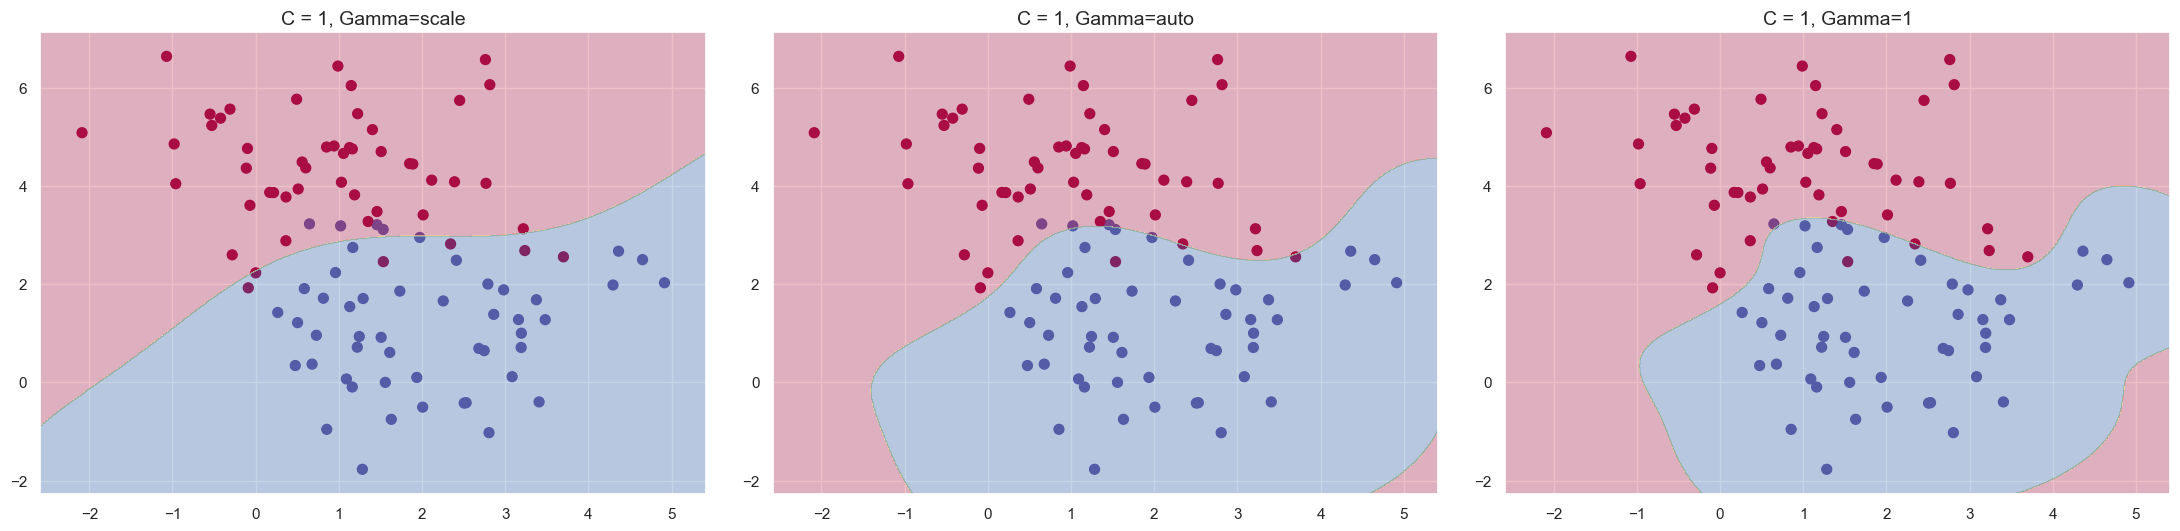

In [ ]:
# Investigate nonlinear decision boundary for non-separable data
# for different values of the parameter C
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C, gamma in zip(ax, [1, 1, 1], ['scale', 'auto', 1]):
  model = SVC(kernel = 'rbf', C = C, gamma = gamma).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Spectral)
  plot_svc_decision_function(model, axi, plot_margin = False, plot_support = False)
  axi.set_title(f'C = {C}, Gamma={gamma}', size=14)